In [ ]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from tools.utils.sqlite_utils import create_connection

import pandas as pd

In [4]:
conn = create_connection('../dataset/CVEfixes_v1.0.8/Data/DB.db')

In [11]:
query = f"""
SELECT
        f.file_change_id,
        f.programming_language,
        cwe.cwe_id,
        f.code_after AS non_vuln_code,
        f.code_before AS vuln_code,
        cwe.description AS cwe_description,
        f.diff_parsed,
        cve.description AS cve_description,
        f.token_count
FROM file_change f
        INNER JOIN fixes
                ON f.hash = fixes.hash
        INNER JOIN cve
                ON fixes.cve_id = cve.cve_id
        INNER JOIN cwe_classification
                ON cve.cve_id = cwe_classification.cve_id
        INNER JOIN cwe
                ON cwe_classification.cwe_id = cwe.cwe_id
WHERE
        f.num_lines_added<=1
        AND f.num_lines_deleted<=1
        AND f.programming_language IS NOT NULL
        AND cwe.cwe_id IS NOT NULL
        AND cwe.cwe_name IS NOT NULL
        AND f.code_before IS NOT NULL
        AND cwe.description IS NOT NULL
        AND f.diff_parsed IS NOT NULL
        AND cve.description IS NOT NULL
        AND f.token_count IS NOT NULL;
    """
df = pd.read_sql(query, con=conn)

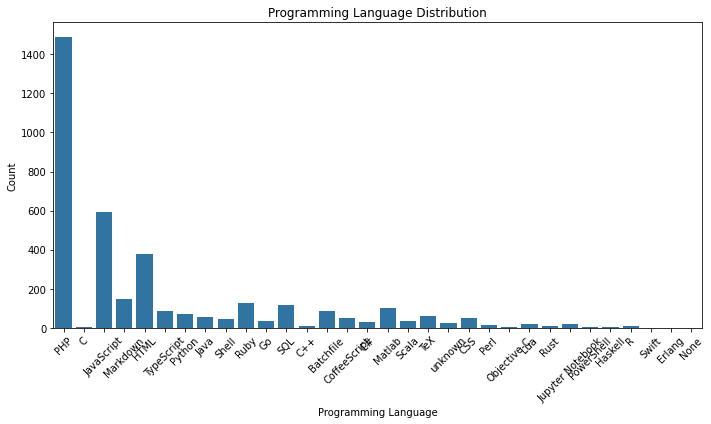

In [16]:
# Visualize Programming Language Distribution with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

chosen_cwes = ['CWE-79', 'CWE-89', 'CWE-434', 'CWE-352']

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['cwe_id'].isin(chosen_cwes)], x='programming_language', order=df['programming_language'].value_counts().index)
plt.title('Programming Language Distribution')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()